In [1]:
import os
import fsspec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
from classy import Class

In [3]:
os.getcwd() #get directory that my stupid script is using

'/Users/ibiniam/Documents/CosmoLab/Scripts'

In [4]:
cols = ['ell', 'Dell', 'sigma(Dell)'] #columns for data frame

npEE = np.genfromtxt("../cmbonly_spectra_dr4.01/act_dr4.01_D_ell_EE_cmbonly.txt")
npTE = np.genfromtxt("../cmbonly_spectra_dr4.01/act_dr4.01_D_ell_TE_cmbonly.txt")
npTT = np.genfromtxt("../cmbonly_spectra_dr4.01/act_dr4.01_D_ell_TT_cmbonly.txt")

DR4EE = pd.DataFrame(npEE, columns = cols) #data frame for polarization spectra
DR4TE = pd.DataFrame(npTE, columns = cols) #data frame for polarization-temperature spectra
DR4TT = pd.DataFrame(npTT, columns = cols) #data frame for temperature spectra

In [5]:
lEE = np.array(DR4EE["ell"]); DlEE = np.array(DR4EE["Dell"]); errEE = np.array(DR4EE["sigma(Dell)"])
lTE = np.array(DR4TE["ell"]); DlTE = np.array(DR4TE["Dell"]); errTE = np.array(DR4TE["sigma(Dell)"])
lTT = np.array(DR4TT["ell"]); DlTT = np.array(DR4TT["Dell"]); errTT = np.array(DR4TT["sigma(Dell)"])

#index = [0,1,2,3,4]
#remove 5 extra data points in EE and TE so all arrays are the same size and easy to work with
#lEE = np.delete(lEE, index); DlEE = np.delete(DlEE, index); errEE = np.delete(errEE, index);
#lTE = np.delete(lTE, index); DlTE = np.delete(DlTE, index); errTE = np.delete(errTE, index);
#lTT = np.array(DR4TT["ell"]); DlTT = np.array(DR4TT["Dell"]); errTT = np.array(DR4TT["sigma(Dell)"])

In [6]:
theory_parameters = {'output':'tCl, pCl, lCl, mPk',
                     'lensing':'yes',
                     'f_idm':.9,
                     'm_idm': 1e12,
                     'cross_idm_b':1e-41,
                     'n_index_idm_b':-4,
                     'l_max_scalars': 4500
              }

cosmo = Class()
cosmo.set(theory_parameters)
cosmo.compute()

In [7]:
cls = cosmo.lensed_cl(4500)

ll = cls['ell'][2:]
clTT = cls['tt'][2:] 
clEE = cls['ee'][2:] 
clTE = cls['te'][2:]

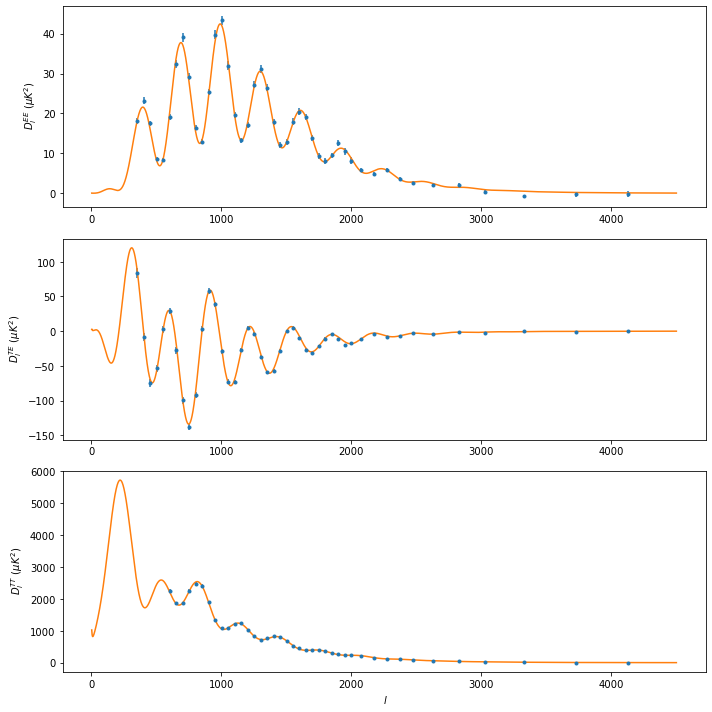

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,10))
ax1.set_ylabel('$\ D_l^{EE} \ (\mu K^2)$')
ax1.errorbar(lEE, DlEE, yerr=errEE, marker=".", linestyle=' ') #plotting polarization data
ax1.plot(ll, (2.7255e6**2)*clEE*ll*(ll+1)/2./np.pi)
ax2.set_ylabel('$\ D_l^{TE} \ (\mu K^2)$')
ax2.errorbar(lTE, DlTE, yerr=errTE, marker=".", linestyle=' ') #plotting polarization-temperature data
ax2.plot(ll, (2.7255e6**2)*clTE*ll*(ll+1)/2./np.pi)
ax3.set_xlabel('$\ l $'); ax3.set_ylabel('$\ D_l^{TT} \ (\mu K^2)$')
ax3.errorbar(lTT, DlTT, yerr=errTT, marker=".", linestyle=' ') #plotting temperature data
ax3.plot(ll, (2.7255e6**2)*clTT*ll*(ll+1)/2./np.pi)
plt.tight_layout()

In [11]:
from scipy.interpolate import InterpolatedUnivariateSpline

funEE = InterpolatedUnivariateSpline(ll, (2.7255e6**2)*clEE*ll*(ll+1)/2./np.pi)
funTE = InterpolatedUnivariateSpline(ll, (2.7255e6**2)*clTE*ll*(ll+1)/2./np.pi)
funTT = InterpolatedUnivariateSpline(ll, (2.7255e6**2)*clTT*ll*(ll+1)/2./np.pi)

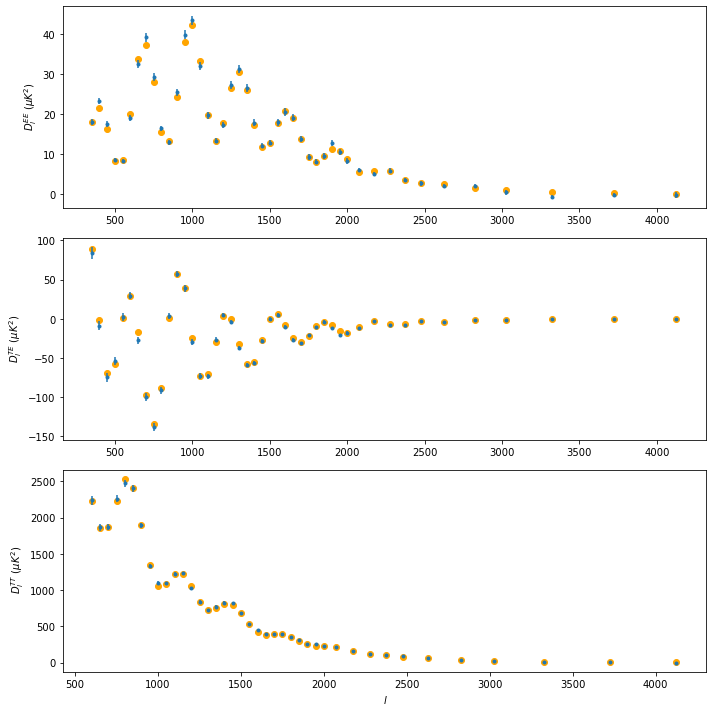

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,10))
ax1.set_ylabel('$\ D_l^{EE} \ (\mu K^2)$')
ax1.errorbar(lEE, DlEE, yerr=errEE, marker=".", linestyle=' ') #plotting polarization data
ax1.scatter(lEE, funEE(lEE), color='orange')
ax2.set_ylabel('$\ D_l^{TE} \ (\mu K^2)$')
ax2.errorbar(lTE, DlTE, yerr=errTE, marker=".", linestyle=' ') #plotting polarization-temperature data
ax2.scatter(lTE, funTE(lTE), color='orange')
ax3.set_xlabel('$\ l $'); ax3.set_ylabel('$\ D_l^{TT} \ (\mu K^2)$')
ax3.errorbar(lTT, DlTT, yerr=errTT, marker=".", linestyle=' ') #plotting temperature data
ax3.scatter(lTT, funTT(lTT), color='orange')
plt.tight_layout()

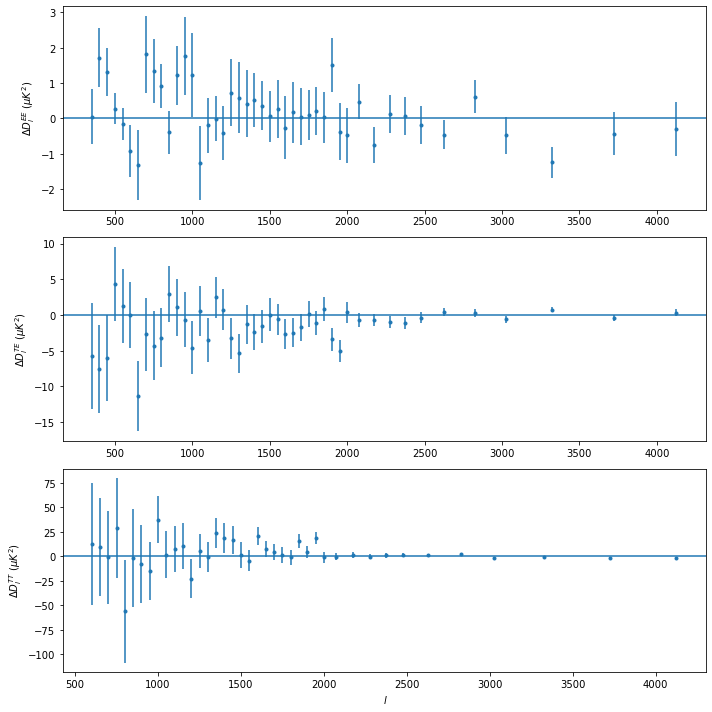

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,10))
ax1.set_ylabel('$\Delta D_l^{EE} \ (\mu K^2)$')
ax1.errorbar(lEE, DlEE - funEE(lEE), yerr=errEE, marker=".", linestyle=' ') #plotting polarization data
ax1.axhline(y=0)
ax2.set_ylabel('$\Delta D_l^{TE} \ (\mu K^2)$')
ax2.errorbar(lTE, DlTE - funTE(lTE), yerr=errTE, marker=".", linestyle=' ') #plotting polarization-temperature data
ax2.axhline(y=0)
ax3.set_xlabel('$\ l $'); ax3.set_ylabel('$\Delta D_l^{TT} \ (\mu K^2)$')
ax3.errorbar(lTT, DlTT - funTT(lTT), yerr=errTT, marker=".", linestyle=' ') #plotting temperature data
ax3.axhline(y=0)
plt.tight_layout()